# Title- Titanic: Machine Learning from Disaster

### Competition Description

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

#### Practice Skills
###### Binary classification 
---

### Overview
The data has been split into two groups:

training set (train.csv)
test set (test.csv)

The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

We also include gender_submission.csv, a set of predictions that assume all and only female passengers survive, as an example of what a submission file should look like.

----

### Data Dictionary

<table>
<tbody>
<tr><th><b>Variable</b></th><th><b>Definition</b></th><th><b>Key</b></th></tr>
<tr>
<td>survival</td>
<td>Survival</td>
<td>0 = No, 1 = Yes</td>
</tr>
<tr>
<td>pclass</td>
<td>Ticket class</td>
<td>1 = 1st, 2 = 2nd, 3 = 3rd</td>
</tr>
<tr>
<td>sex</td>
<td>Sex</td>
<td></td>
</tr>
<tr>
<td>Age</td>
<td>Age in years</td>
<td></td>
</tr>
<tr>
<td>sibsp</td>
<td># of siblings / spouses aboard the Titanic</td>
<td></td>
</tr>
<tr>
<td>parch</td>
<td># of parents / children aboard the Titanic</td>
<td></td>
</tr>
<tr>
<td>ticket</td>
<td>Ticket number</td>
<td></td>
</tr>
<tr>
<td>fare</td>
<td>Passenger fare</td>
<td></td>
</tr>
<tr>
<td>cabin</td>
<td>Cabin number</td>
<td></td>
</tr>
<tr>
<td>embarked</td>
<td>Port of Embarkation</td>
<td>C = Cherbourg, Q = Queenstown, S = Southampton</td>
</tr>
</tbody>
</table>

 


---
### Variable Notes
<p><b>pclass</b>: A proxy for socio-economic status (SES)<br> 1st = Upper<br> 2nd = Middle<br> 3rd = Lower<br><br> <b>age</b>: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5<br><br> <b>sibsp</b>: The dataset defines family relations in this way...<br> Sibling = brother, sister, stepbrother, stepsister<br> Spouse = husband, wife (mistresses and fiancés were ignored)<br><br> <b>parch</b>: The dataset defines family relations in this way...<br> Parent = mother, father<br> Child = daughter, son, stepdaughter, stepson<br> Some children travelled only with a nanny, therefore parch=0 for them.</p>

---
### 1.Prepare Problem
#### a.Load libraries
#### b.Load dataset
##### for this problem we will be loading training set and test  from two files as given by kaggle 

In [1]:
import os
import math
import datetime

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer

from mlsettings.settings import load_app_config, get_datafolder_path
from mltools.mlcommon import load_data, print_dataset_info, split_dataset, auto_scatter_simple

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
 
% matplotlib inline 
from numpy import set_printoptions
set_printoptions(precision=4)

In [2]:
load_app_config()
DIRECTORY="kaggle_titanic"
TRAIN_FILE ='train.csv'
TEST_FILE = 'test.csv'
RESPONSE = 'Survived'
input_path = get_datafolder_path()

{'REG': {'ML_DATASOURCE': 'F:\\DataSource', 'ML_PATH': 'F:\\MachineLearning'}, 'PRD': {'ML_DATASOURCE': 'F:\\DataSource', 'ML_PATH': 'F:\\MachineLearning'}, 'UAT': {'ML_DATASOURCE': 'F:\\DataSource', 'ML_PATH': 'F:\\MachineLearning'}, 'DEV': {'ML_DATASOURCE': 'F:\\DataSource', 'ML_PATH': 'F:\\MachineLearning'}}
Adding F:\DataSource  to system path
Adding F:\MachineLearning  to system path


In [3]:
def load_dataset(filename=TRAIN_FILE,response=RESPONSE):
    input_file = os.path.join(input_path, DIRECTORY, filename)
    input_dataset = load_data(input_file)
    print(" input file is :{0} loaded.".format(input_file))
    #print(input_dataset.head())
    
    try:
        continuous_vars = input_dataset.describe().columns.values.tolist()
        print("Continous Variables")
        print(continuous_vars)
    except ValueError:
        print("No continous variables")
    
    try:
        categorical_vars = input_dataset.describe(include=["object"]).columns.values.tolist()
        print("Categorical Variables")
        print(categorical_vars)
    except ValueError:
        print("No categorical variables")
        categorical_vars = None
    
    response_column =  [col for col in input_dataset.columns if response in col]
    feature_columns =  [col for col in input_dataset.columns if response not in col]
      
    return  input_dataset,feature_columns,response_column,continuous_vars,categorical_vars


In [7]:
train_dataset,feature_columns,response_column,continuous_vars,categorical_vars = load_dataset(filename=TRAIN_FILE,response=RESPONSE)
train_X = train_dataset[feature_columns]
train_y = train_dataset[response_column]


 input file is :F:\DataSource\kaggle_titanic\train.csv loaded.
Continous Variables
['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
Categorical Variables
['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


In [8]:
test_dataset,tfeature_columns,tresponse_column,tcontinuous_vars,tcategorical_vars  = load_dataset(filename=TEST_FILE,response=RESPONSE)
test_X =[]
test_y=[]
if feature_columns:
    test_X = test_dataset[tfeature_columns]

if response_column:
    test_y = test_dataset[tfeature_columns]
   

 input file is :F:\DataSource\kaggle_titanic\test.csv loaded.
Continous Variables
['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
Categorical Variables
['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


In [9]:
'''
from collections import Counter
def detect_outliers(dataset,noutliers,columns):
    outlier_indices = []
    for column in columns:
        # 1st quartile (25%)
        Q1 = np.percentile(dataset[column], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(dataset[column],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = dataset[(dataset[column] < Q1 - outlier_step) | (dataset[column] > Q3 + outlier_step )].index
        outlier_indices.extend(outlier_list_col)
         
    outlier_indices = Counter(outlier_indices)
     
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > noutliers )
    return multiple_outliers 
        
Outliers_to_drop = detect_outliers(train_dataset,2,["Age","SibSp","Parch","Fare"])
print(train_dataset.loc[Outliers_to_drop])
train_dataset = train_dataset.drop(Outliers_to_drop, axis = 0).reset_index(drop=True)
train_X = train_dataset[feature_columns]
train_y = train_dataset[response_column]
'''

'\nfrom collections import Counter\ndef detect_outliers(dataset,noutliers,columns):\n    outlier_indices = []\n    for column in columns:\n        # 1st quartile (25%)\n        Q1 = np.percentile(dataset[column], 25)\n        # 3rd quartile (75%)\n        Q3 = np.percentile(dataset[column],75)\n        # Interquartile range (IQR)\n        IQR = Q3 - Q1\n        \n        # outlier step\n        outlier_step = 1.5 * IQR\n        \n        # Determine a list of indices of outliers for feature col\n        outlier_list_col = dataset[(dataset[column] < Q1 - outlier_step) | (dataset[column] > Q3 + outlier_step )].index\n        outlier_indices.extend(outlier_list_col)\n         \n    outlier_indices = Counter(outlier_indices)\n     \n    multiple_outliers = list( k for k, v in outlier_indices.items() if v > noutliers )\n    return multiple_outliers \n        \nOutliers_to_drop = detect_outliers(train_dataset,2,["Age","SibSp","Parch","Fare"])\nprint(train_dataset.loc[Outliers_to_drop])\ntrai

In [10]:
print(train_X.info())
print(test_X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 76.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null

### 2.Summarize Data 
#### a) Descriptive statistics
#### b) Data visualizations


In [11]:
def display_data_descriptives(input_dataset,X,feature_columns,y,response_column):
    print("<{0} {1} {0}>".format("="*40,"info"))
    print(input_dataset.info())
    print("<{0} {1} {0}>".format("="*40,"feature columns"))
    print(feature_columns)
    print("<{0} {1} {0}>".format("="*40,"data header"))
    print(X.head().to_string())
    print("<{0} {1} {0}>".format("="*40,"response"))
    print(response_column)
    print("<{0} {1} {0}>".format("="*40,"Descriptive Statistics -X"))
    print(X.describe())
    print("<{0} {1} {0}>".format("="*40,"Descriptive Statistics -y"))
    print(y.describe())
    print("<{0} {1} {0}>".format("="*40,"value_count -y"))
 
    print(y.groupby(response_column)[response_column].count())
    ##print("<{0} {1} {0}>".format("="*40,"Correlation"))
    ##print(input_dataset.corr(method='pearson'))

In [12]:
pd.set_option('display.width', 120)
pd.set_option('precision', 4)
display_data_descriptives(train_dataset,train_X,feature_columns,train_y,response_column)
#display_data_descriptives(test_dataset,tfeature_columns,tresponse_column,tcontinuous_vars,tcategorical_vars)
print(test_dataset.info())

<======================================== info ========================================>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None
<======================================== feature columns ========================================>
['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
<======================================== data header ========================================>
   PassengerId  Pcla

In [13]:
categorical = ['Sex', 'Embarked','SibSp','Parch','Pclass']
def bar_plots(train_dataset,categorical):
    fig = plt.figure(figsize=(16,12))
    size =len(categorical)
     
    for i in range(size):
        #counts=train_dataset.groupby(categorical[i])['Survived'].value_counts()
        #print("Dataset group by {0} ".format(categorical[i]))
        #print(counts)
        ax = fig.add_subplot(3, 2, i+1)
        sns.barplot(x=categorical[i], y="Survived", data=train_dataset,ax=ax,errwidth =0)
        sns.despine()
    plt.tight_layout()

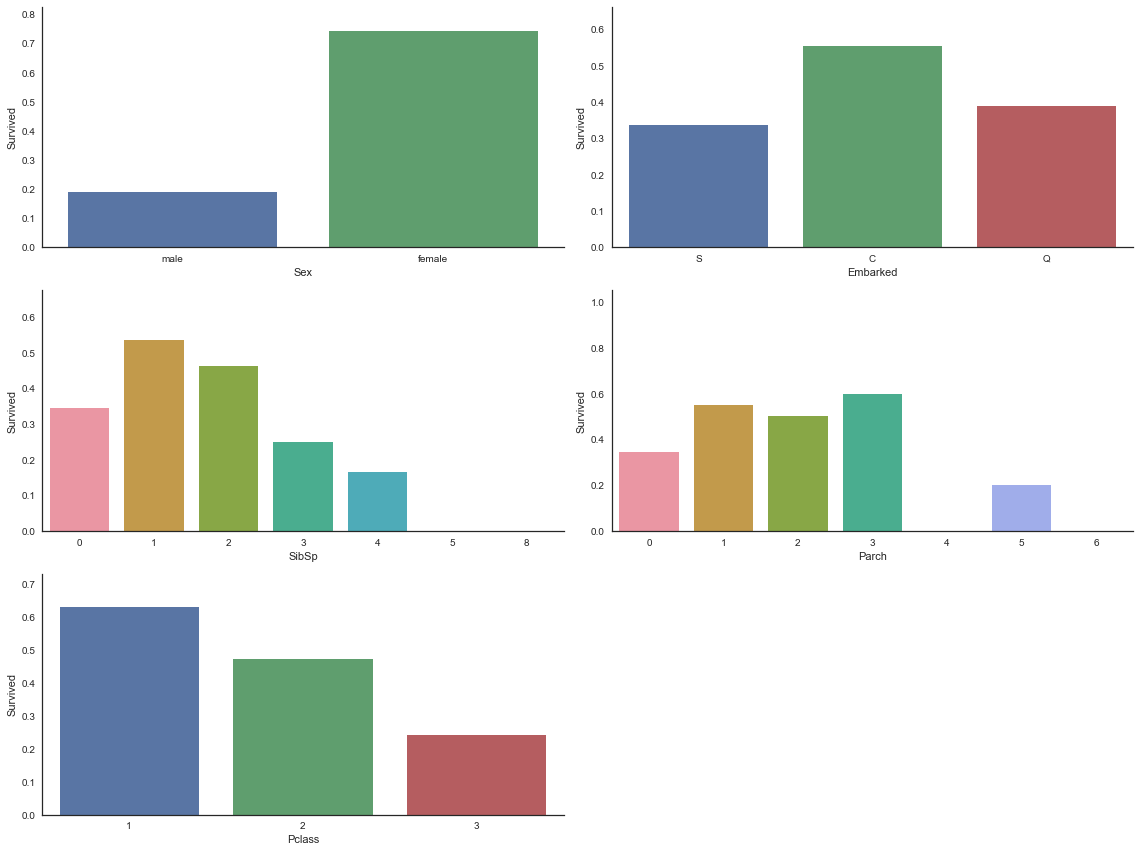

In [14]:
sns.set(style="white", color_codes=True)

flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]

bar_plots(train_dataset,categorical)

### Inferences  from bar plots  
##### Survival rate of female is more than males in all passenger categories
##### Survival rate for passenger class 3 is least
##### Survival rate of  passengers boarded at Embarked  at  C is greater than others
##### Passengers havings siblings survived better  than  zero siblings
##### Passengers travelling alone had less chances of survival than families 



In [12]:
#g  = sns.factorplot(x="Pclass", hue="Sex", col="Survived",data=train_dataset, kind="count",size=5, aspect=.7,palette=flatui);
#g1 = sns.factorplot(x="Embarked", hue="Sex", col="Survived",data=train_dataset, kind="count",size=5, aspect=.7,palette=flatui);   
#g2 = sns.factorplot(x="SibSp", col="Survived",data=train_dataset, kind="count",size=5, aspect=.7,palette=sns.color_palette("husl",2)); 
#g3 = sns.factorplot(x="Parch", col="Survived",data=train_dataset, kind="count",size=5, aspect=.7,palette=sns.color_palette("husl",2)); 

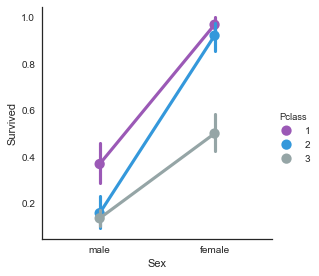

In [15]:
g = sns.factorplot(x='Sex',y='Survived',hue='Pclass',size=4, aspect=1,palette=flatui ,data =train_dataset)

##### Women  from 1st  and 2nd class have 100 % survival
##### Men from 2nd and 3rd Pclass have only around 10% survival chance.

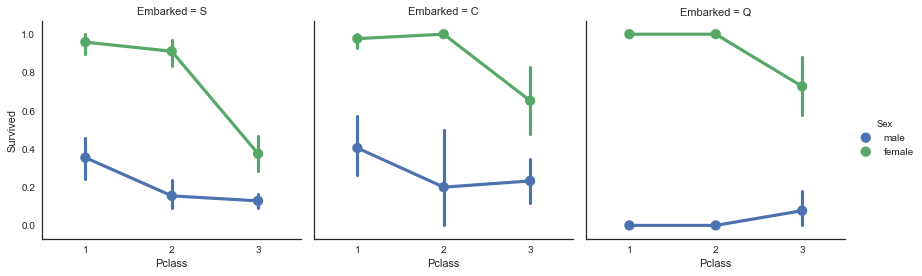

In [16]:
g1 =sns.factorplot(x='Pclass', y='Survived', hue='Sex', col='Embarked', data=train_dataset)

##### Males from Pclass 1 only have slightly higher survival chance than Pclass 2 and 3

---  
### 3. Prepare Data
#### a) Data Cleaning
#### b) Feature Selection
#### c) Data Transforms

In [17]:
from sklearn.preprocessing import Imputer


In [18]:
full_dataset = [train_dataset,test_dataset]
 
## identity the null data sets 
for dataset in full_dataset:
    print("<{0} {1} {0}>".format("="*40,"Columns having null values"))
    check_null = dataset.isnull().sum()[dataset.isnull().sum()>0] 
    print(check_null)
     

<======================================== Columns having null values ========================================>
Age         177
Cabin       687
Embarked      2
dtype: int64
<======================================== Columns having null values ========================================>
Age       86
Fare       1
Cabin    327
dtype: int64


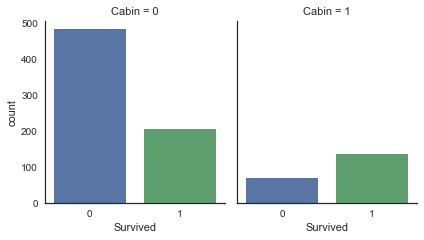

In [19]:
first_char = lambda x : x[0]
transform_cabin = lambda x : 1 if x!='X' else 0
for dataset in full_dataset:
    dataset['Cabin'].fillna('X' ,inplace=True)
    dataset['Cabin']= dataset['Cabin'].map(first_char)
    dataset['Cabin']= dataset['Cabin'].map(transform_cabin)

g = sns.factorplot("Survived", col="Cabin" ,col_wrap=4 ,data=full_dataset[0],kind="count", size=3.5, aspect=.8)


In [20]:
for dataset in full_dataset:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.',expand=False)
    
print(train_dataset.groupby('Title')['Survived'].value_counts())
print(test_dataset.groupby('Title')['Name'].count()) 
for dataset in full_dataset:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Other')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
full_dataset[0][['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

Title     Survived
Capt      0             1
Col       0             1
          1             1
Countess  1             1
Don       0             1
Dr        0             4
          1             3
Jonkheer  0             1
Lady      1             1
Major     0             1
          1             1
Master    1            23
          0            17
Miss      1           127
          0            55
Mlle      1             2
Mme       1             1
Mr        0           436
          1            81
Mrs       1            99
          0            26
Ms        1             1
Rev       0             6
Sir       1             1
Name: Survived, dtype: int64
Title
Col         2
Dona        1
Dr          1
Master     21
Miss       78
Mr        240
Mrs        72
Ms          1
Rev         2
Name: Name, dtype: int64


,Title,Survived
0,Master,0.5750
1,Miss,0.7027
2,Mr,0.1567
3,Mrs,0.7937
4,Other,0.3478


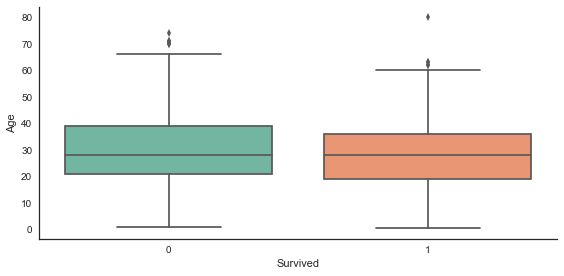

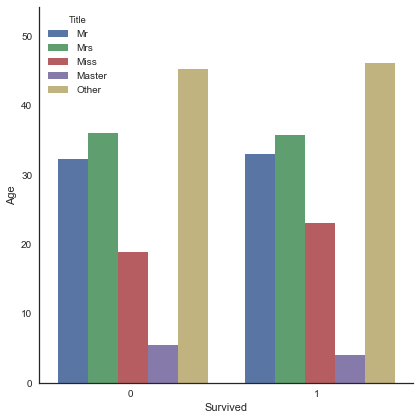

In [21]:
#ax  =sns.violinplot(x="Embarked", y="Age", hue="Survived", data=train_dataset, split=True)
fig = plt.figure(figsize=(8,4)) 
ax = sns.boxplot(y="Age",x='Survived', data=train_dataset, palette="Set2")
ax.set_xticklabels(ax.get_xticklabels())
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

fig = plt.figure(figsize=(6,6)) 
ax = fig.add_subplot(1, 1, 1)
sns.barplot(x='Survived' , y='Age' ,hue ='Title',data=train_dataset,ax=ax,errwidth =0)
ax.set_xticklabels(ax.get_xticklabels(),ha='right')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.show()



In [22]:
train_mean_age =full_dataset[0][['Title', 'Age']].groupby(['Title'], as_index=False).mean().set_index('Title') 
 

In [23]:
 
test_mean_age =full_dataset[1][['Title', 'Age']].groupby(['Title'], as_index=False).mean().set_index('Title') 
test_mean_age

,Age
Title,
Master,7.4065
Miss,21.7748
Mr,32.0000
Mrs,38.9032
Other,43.8333


In [24]:
full_dataset[0][full_dataset[0]["Age"].isnull()].groupby(['Title'], as_index=False)['Age'].count()

,Title,Age
0,Master,0
1,Miss,0
2,Mr,0
3,Mrs,0
4,Other,0


In [25]:
full_dataset[1][full_dataset[1]["Age"].isnull()].groupby(['Title'], as_index=False)['Age'].count()

,Title,Age
0,Master,0
1,Miss,0
2,Mr,0
3,Mrs,0


####  Transform  sex  label in numerical categorical value, assign mean age  to null 
#####  Fill in missing Embarked values 

In [26]:
age_null_index =list(full_dataset[0]["Age"][full_dataset[0]["Age"].isnull()].index)
 
for each_index in age_null_index:
    title =full_dataset[0]['Title'].iloc[each_index]
    if title =='Other':
        full_dataset[0]['Age'].iloc[each_index] = -1
    else:
        age= train_mean_age.loc[title]['Age']
        full_dataset[0]['Age'].iloc[each_index] = age
     

F:\Anaconda2\envs\machinelearning\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [27]:
full_dataset[0][full_dataset[0]["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title


In [28]:
tage_null_index =list(full_dataset[1]["Age"][full_dataset[1]["Age"].isnull()].index)
 
for each_index in tage_null_index:
    title =full_dataset[1]['Title'].iloc[each_index]
    if title =='Other':
        full_dataset[1]['Age'].iloc[each_index] = -1
    else:
        age= test_mean_age.loc[title]['Age']
        full_dataset[1]['Age'].iloc[each_index] = age

F:\Anaconda2\envs\machinelearning\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [29]:
full_dataset[1][full_dataset[1]["Age"].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title


In [30]:
sex_mapping= {'male':0,'female':1}
for dataset in full_dataset:
    dataset['Sex'] =dataset['Sex'].map(sex_mapping)
    dataset['Embarked'] = dataset['Embarked'].fillna('S')
    
    '''
    median_age = math.ceil(dataset["Age"].median())
    #dataset['Age'].fillna(median_age, inplace=True)
    
    age_null_index =list(dataset["Age"][dataset["Age"].isnull()].index)
    print(len(age_null_index))
    for each_index in age_null_index:
        median_age = math.ceil(dataset["Age"].median())
        pred_age = dataset["Age"][((dataset['SibSp'] == dataset.iloc[each_index]["SibSp"]) &
                                   (dataset['Parch'] == dataset.iloc[each_index]["Parch"]) &
                                   (dataset['Pclass'] == dataset.iloc[each_index]["Pclass"]))].median()
        if not np.isnan(pred_age) :
            dataset['Age'].iloc[each_index] = pred_age
        else :
            dataset['Age'].iloc[each_index] = pred_age
    '''
    
for dataset in full_dataset:
    print("<{0} {1} {0}>".format("="*40,"Columns having null values"))
    check_null = dataset.isnull().sum()[dataset.isnull().sum()>0] 
    print(check_null)

#test_dataset[test_dataset["Age"].isnull()]

<======================================== Columns having null values ========================================>
Series([], dtype: int64)
<======================================== Columns having null values ========================================>
Fare    1
dtype: int64


####  Transform Fare 

In [64]:
#test_dataset['Age'].fillna(median_age, inplace=True)
#full_dataset = [train_dataset,test_dataset]
full_dataset[1][full_dataset[1]["Fare"].isnull()]

print(full_dataset[1][  (full_dataset[1]['Pclass'] ==3  ) & 
                  (full_dataset[1]['Sex'] ==0  ) &
                  (full_dataset[1]['Age'] >= 50  )
               ])
# assign same fare
full_dataset[1]['Fare'].iloc[152]=14.5
print(full_dataset[1][  (full_dataset[1]['Pclass'] ==3  ) & 
                  (full_dataset[1]['Sex'] ==0  ) &
                  (full_dataset[1]['Age'] >= 50  )
               ])

     PassengerId  Pclass                     Name  Sex   Age  SibSp  Parch     Ticket  Fare  Cabin Embarked Title
25           917       3  Robins, Mr. Alexander A    0  50.0      1      0  A/5. 3337  14.5      0        S    Mr
152         1044       3       Storey, Mr. Thomas    0  60.5      0      0       3701   NaN      0        S    Mr
     PassengerId  Pclass                     Name  Sex   Age  SibSp  Parch     Ticket  Fare  Cabin Embarked Title
25           917       3  Robins, Mr. Alexander A    0  50.0      1      0  A/5. 3337  14.5      0        S    Mr
152         1044       3       Storey, Mr. Thomas    0  60.5      0      0       3701  14.5      0        S    Mr


F:\Anaconda2\envs\machinelearning\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [66]:
from sklearn import feature_extraction
def one_hot_dataframe(data,columns,replace=False):
    fe_vec= feature_extraction.DictVectorizer()
    make_dict = lambda row :dict((column,row[column]) for column in  columns)
    vector_data=pd.DataFrame(fe_vec.fit_transform( data[columns].apply(make_dict, axis=1)).toarray())
    vector_data.columns = fe_vec.get_feature_names()
    vector_data.index= data.index
    if replace:
        data = data.drop(columns, axis=1)
        data = data.join(vector_data)
    return data,vector_data


 

In [67]:
train_dataset,train_dataset_n = one_hot_dataframe(train_dataset, ['Pclass','Embarked', 'Sex','Title','Cabin'], replace=True)
test_dataset,test_dataset_n = one_hot_dataframe(test_dataset, ['Pclass','Embarked', 'Sex','Title','Cabin'], replace=True)

In [72]:
full_dataset = [train_dataset,test_dataset]
train_dataset['AgeBand'] = pd.cut(train_dataset[train_dataset['Age']>-1]['Age']  ,5)
train_dataset['AgeBand'] 

0      (16.336, 32.252]
1      (32.252, 48.168]
2      (16.336, 32.252]
3      (32.252, 48.168]
4      (32.252, 48.168]
5      (32.252, 48.168]
6      (48.168, 64.084]
7        (0.34, 16.336]
8      (16.336, 32.252]
9        (0.34, 16.336]
10       (0.34, 16.336]
11     (48.168, 64.084]
12     (16.336, 32.252]
13     (32.252, 48.168]
14       (0.34, 16.336]
15     (48.168, 64.084]
16       (0.34, 16.336]
17     (32.252, 48.168]
18     (16.336, 32.252]
19     (32.252, 48.168]
20     (32.252, 48.168]
21     (32.252, 48.168]
22       (0.34, 16.336]
23     (16.336, 32.252]
24       (0.34, 16.336]
25     (32.252, 48.168]
26     (32.252, 48.168]
27     (16.336, 32.252]
28     (16.336, 32.252]
29     (32.252, 48.168]
             ...       
861    (16.336, 32.252]
862    (32.252, 48.168]
863    (16.336, 32.252]
864    (16.336, 32.252]
865    (32.252, 48.168]
866    (16.336, 32.252]
867    (16.336, 32.252]
868    (32.252, 48.168]
869      (0.34, 16.336]
870    (16.336, 32.252]
871    (32.252, 

In [74]:
for dataset in full_dataset:
    dataset.loc[ dataset['Age'] < 0, 'Age'] = -1
    dataset.loc[ (dataset['Age'] > 0 ) & (dataset['Age'] <= 16.336), 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16.336) & (dataset['Age'] <= 32.252), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32.252) & (dataset['Age'] <= 48.168), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48.168) & (dataset['Age'] <= 64.084), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64.084, 'Age'] = 4

In [75]:
train_dataset['FareBand'] = pd.qcut(train_dataset['Fare'], 4)
print (train_dataset[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean())

for dataset in full_dataset:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

          FareBand  Survived
0   (-0.001, 7.91]    0.1973
1   (7.91, 14.454]    0.3036
2   (14.454, 31.0]    0.4550
3  (31.0, 512.329]    0.5811


In [76]:
for dataset in full_dataset:
    dataset['FamilySize'] = dataset['SibSp'] +  dataset['Parch'] + 1
    #dataset['IsAlone'] = 0
    #dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1
    dataset['Single'] = dataset['FamilySize'].map(lambda s: 1 if s == 1 else 0)
    dataset['SmallF'] = dataset['FamilySize'].map(lambda s: 1 if  s == 2  else 0)
    dataset['MedF'] = dataset['FamilySize'].map(lambda s: 1 if 3 <= s <= 4 else 0)
    dataset['LargeF'] = dataset['FamilySize'].map(lambda s: 1 if s >= 5 else 0)
    


#### Feature Selection

In [77]:
features_drop = ['Name', 'SibSp', 'Parch','FamilySize','Ticket']
train_dataset = train_dataset.drop(features_drop, axis=1)
test_dataset = test_dataset.drop(features_drop, axis=1)
train_dataset = train_dataset.drop(['PassengerId', 'AgeBand', 'FareBand'], axis=1)




ValueError: labels ['Cabin=T'] not contained in axis

In [78]:
### we will drop Cabin T
X_train = train_dataset.drop(['Survived'], axis=1)
y_train = train_dataset['Survived']
X_test = test_dataset.drop("PassengerId", axis=1).copy()

In [81]:
print(X_train.columns.values)
print(X_test.columns.values)
all_features  =set(X_test.columns.values).intersection(set(X_train.columns.values))
all_features =list(all_features)
print(all_features)

X_train.shape, y_train.shape, X_test.shape
 

['Age' 'Fare' 'Cabin' 'Embarked=C' 'Embarked=Q' 'Embarked=S' 'Pclass' 'Sex'
 'Title=Master' 'Title=Miss' 'Title=Mr' 'Title=Mrs' 'Title=Other' 'Single'
 'SmallF' 'MedF' 'LargeF']
['Age' 'Fare' 'Cabin' 'Embarked=C' 'Embarked=Q' 'Embarked=S' 'Pclass' 'Sex'
 'Title=Master' 'Title=Miss' 'Title=Mr' 'Title=Mrs' 'Title=Other' 'Single'
 'SmallF' 'MedF' 'LargeF']
['Title=Other', 'SmallF', 'Fare', 'Title=Mr', 'Sex', 'Title=Master', 'LargeF', 'Embarked=Q', 'Embarked=S', 'Single', 'Age', 'Cabin', 'MedF', 'Embarked=C', 'Title=Mrs', 'Title=Miss', 'Pclass']


((891, 17), (891,), (418, 17))

In [82]:
X_train =X_train[all_features]
X_test = X_test[all_features]
X_train.shape, y_train.shape, X_test.shape
print(all_features)

['Title=Other', 'SmallF', 'Fare', 'Title=Mr', 'Sex', 'Title=Master', 'LargeF', 'Embarked=Q', 'Embarked=S', 'Single', 'Age', 'Cabin', 'MedF', 'Embarked=C', 'Title=Mrs', 'Title=Miss', 'Pclass']


### 4. Evaluate Algorithms
####  a) Split-out validation dataset
####  b) Test options and evaluation metric
####  c) Spot Check Algorithms
####  d) Compare Algorithms

In [83]:
X_train.head()

,Title=Other,SmallF,Fare,Title=Mr,Sex,Title=Master,LargeF,Embarked=Q,Embarked=S,Single,Age,Cabin,MedF,Embarked=C,Title=Mrs,Title=Miss,Pclass
0,0.0,1,0,1.0,0.0,0.0,0,0.0,1.0,0,0.0,0.0,0,0.0,0.0,0.0,3.0
1,0.0,1,3,0.0,1.0,0.0,0,0.0,0.0,0,0.0,1.0,0,1.0,1.0,0.0,1.0
2,0.0,0,1,0.0,1.0,0.0,0,0.0,1.0,1,0.0,0.0,0,0.0,0.0,1.0,3.0
3,0.0,1,3,0.0,1.0,0.0,0,0.0,1.0,0,0.0,1.0,0,0.0,1.0,0.0,1.0
4,0.0,0,1,1.0,0.0,0.0,0,0.0,1.0,1,0.0,0.0,0,0.0,0.0,0.0,3.0


In [84]:
from sklearn.model_selection  import  train_test_split
from sklearn.linear_model  import LogisticRegression
test_size = 0.33
seed = 7

X_trainmodel, X_val, y_trainmodel, y_val = train_test_split(X_train, y_train, test_size=test_size,random_state=seed)

In [85]:
logrmodel = LogisticRegression()
logrmodel.fit(X_trainmodel, y_trainmodel.values.ravel())
result = logrmodel.score(X_trainmodel, y_trainmodel.values)
print ("Accuracy: {0:.3f}".format(result*100.0))

Accuracy: 85.067


In [86]:
from sklearn.svm import LinearSVC
lin_svc = LinearSVC()
lin_svc.fit(X_trainmodel, y_trainmodel.values.ravel())
#y_pred_linear_svc = lin_svc.predict(X_test)
acc_linear_svc = round(lin_svc.score(X_trainmodel, y_trainmodel) * 100, 2)
print (acc_linear_svc)

85.23


In [87]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
def train_and_evaluate(model, X_train, y_train, t_splits =10,seed=7):
    model.fit(X_train, y_train)
    print ("Coefficient of determination on training set:",model.score(X_train, y_train))
    # create a k-fold cross validation iterator of k=5 folds
    cv = KFold(n_splits= t_splits,shuffle=True, random_state=seed)
    scores = cross_val_score(model, X_train, y_train, cv=cv)
    print(scores)
    print ("Average coefficient of determination using {0}-fold crossvalidation:{1}".format(t_splits,np.mean(scores)))

In [88]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

Accuracy of LR is 0.848954802259887 with variance 0.04833547958397685
Accuracy of DT is 0.8203389830508476 with variance 0.05491412079460833
Accuracy of KNN is 0.8203954802259888 with variance 0.05605131983147354
Accuracy of GB is 0.818728813559322 with variance 0.05592336430756287
Accuracy of SVC is 0.8505932203389831 with variance 0.05321788741699568
Accuracy of RFC is 0.833870056497175 with variance 0.051018145714893964


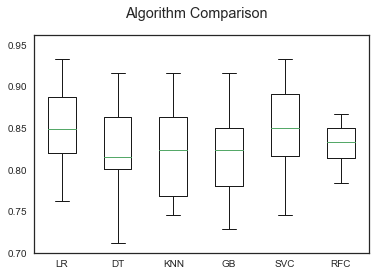

In [89]:
models = []
models.append(('LR', LogisticRegression()))
###models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('DT',DecisionTreeClassifier()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('GB',GaussianNB()))
models.append(('SVC',SVC()))
models.append(('RFC',RandomForestClassifier(n_estimators=300,random_state=0,criterion='entropy')))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = KFold(n_splits=10, random_state=7)
    cv_results = cross_val_score(model, X_trainmodel, y_trainmodel.values.ravel(), cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "Accuracy of {0} is {1} with variance {2}".format(name, cv_results.mean(), cv_results.std())
    print(msg)
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [90]:
from sklearn import metrics
def measure_performance(X, y, clf, show_accuracy=True,show_classification_report=True,
                        show_confusion_matrix=True, show_r2_score=False):
    y_pred = clf.predict(X) 
    if show_accuracy:
        print ("Accuracy:{0:.3f}".format( metrics.accuracy_score(y, y_pred)) )
    if show_classification_report:
        print ("Classification report")
        print (metrics.classification_report(y, y_pred))
    if show_confusion_matrix:
        print("Confusion matrix") 
        print(metrics.confusion_matrix(y, y_pred),)
    if show_r2_score:
        print ("Coefficient of determination:{0:.3f}"
               .format( metrics.r2_score(y, y_pred)))
    return y_pred

In [91]:
svc=SVC()
svc.fit(X_trainmodel, y_trainmodel.values.ravel())
y_pred=measure_performance(X_val,y_val,svc, show_accuracy=False, 
                    show_classification_report=True,
                    show_confusion_matrix=True, show_r2_score=False)

Classification report
             precision    recall  f1-score   support

          0       0.80      0.88      0.83       176
          1       0.78      0.67      0.72       119

avg / total       0.79      0.79      0.79       295

Confusion matrix
[[154  22]
 [ 39  80]]


In [92]:
rfc =RandomForestClassifier(n_estimators=300,random_state=0 )
print(rfc)
rfc.fit(X_trainmodel, y_trainmodel.values.ravel())
y_pred=measure_performance(X_val,y_val,rfc, show_accuracy=False, 
                    show_classification_report=True,
                    show_confusion_matrix=True, show_r2_score=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=300, n_jobs=1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)
Classification report
             precision    recall  f1-score   support

          0       0.79      0.89      0.84       176
          1       0.80      0.65      0.72       119

avg / total       0.79      0.79      0.79       295

Confusion matrix
[[157  19]
 [ 42  77]]


In [93]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
'''
param_grid = [{'kernel': ['rbf'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100],
               'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
              {'kernel': ['linear'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100]}]
print("List of grids:\n{}".format(param_grid))
grid_search = GridSearchCV(SVC(), param_grid, cv=5,n_jobs =1)
grid_search.fit(X_trainmodel,y_trainmodel.values.ravel())
print("Test set score: {:.2f}".format(grid_search.score(X_val, y_val)))
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
print("Best estimator:\n{}".format(grid_search.best_estimator_))
'''

'\nparam_grid = [{\'kernel\': [\'rbf\'],\n               \'C\': [0.001, 0.01, 0.1, 1, 10, 100],\n               \'gamma\': [0.001, 0.01, 0.1, 1, 10, 100]},\n              {\'kernel\': [\'linear\'],\n               \'C\': [0.001, 0.01, 0.1, 1, 10, 100]}]\nprint("List of grids:\n{}".format(param_grid))\ngrid_search = GridSearchCV(SVC(), param_grid, cv=5,n_jobs =1)\ngrid_search.fit(X_trainmodel,y_trainmodel.values.ravel())\nprint("Test set score: {:.2f}".format(grid_search.score(X_val, y_val)))\nprint("Best parameters: {}".format(grid_search.best_params_))\nprint("Best cross-validation score: {:.2f}".format(grid_search.best_score_))\nprint("Best estimator:\n{}".format(grid_search.best_estimator_))\n'

In [94]:
rfc= RandomForestClassifier()


## Search grid for optimal parameters
rf_param_grid = {"max_depth": [10],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[1000,2000],
              "criterion": ["entropy"]}


grid_search = GridSearchCV(rfc,param_grid = rf_param_grid, cv=8, scoring="accuracy", verbose = 1,n_jobs =4)

grid_search.fit(X_trainmodel,y_trainmodel.values.ravel())

rfc_best = grid_search.best_estimator_

 #Best score
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
print("Best estimator:\n{}".format(grid_search.best_estimator_))

Fitting 8 folds for each of 54 candidates, totalling 432 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  1.4min
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  5.3min
[Parallel(n_jobs=4)]: Done 432 out of 432 | elapsed: 12.0min finished


Best parameters: {'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 2000, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 3, 'bootstrap': False}
Best cross-validation score: 0.85
Best estimator:
RandomForestClassifier(bootstrap=False, class_weight=None,
            criterion='entropy', max_depth=10, max_features=3,
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=3, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=2000, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


In [97]:
rfc =RandomForestClassifier(bootstrap=False, class_weight=None,
            criterion='gini', max_depth=10, max_features=3,
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=3, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=2000, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
print(rfc)
rfc.fit(X_trainmodel, y_trainmodel.values.ravel())
y_pred=measure_performance(X_val,y_val,rfc, show_accuracy=False, 
                    show_classification_report=True,
                    show_confusion_matrix=True, show_r2_score=False)

print(X_trainmodel.info())
print(X_test.info())
#X_test.to_csv('tranform_test.csv', index=False)
y_pred_result=rfc.predict(X_test)

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=10, max_features=3, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=3,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=2000, n_jobs=1, oob_score=False,
            random_state=None, verbose=0, warm_start=False)
Classification report
             precision    recall  f1-score   support

          0       0.79      0.91      0.84       176
          1       0.83      0.64      0.72       119

avg / total       0.80      0.80      0.79       295

Confusion matrix
[[160  16]
 [ 43  76]]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 596 entries, 65 to 175
Data columns (total 17 columns):
Title=Other     596 non-null float64
SmallF          596 non-null int64
Fare            596 non-null int32
Title=Mr        596 non-null float64
Sex             596 non-null float64
Title=Master    596 non-null float64
LargeF          596 

In [98]:
submission = pd.DataFrame({
        "PassengerId": test_X["PassengerId"],
        "Survived": y_pred_result
    })
submission.to_csv('submission_new_0207.csv', index=False)